In [85]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
if sys.argv[1] == 'xxx': pass
else: 
    %matplotlib inline

import necstdb

In [86]:
cwd = os.getcwd()
mode, date = cwd.split('/')[-2], cwd.split('/')[-1]

data_path = '/media/usbdisk/data/{mode}/{date}/'.format(**locals())

db = necstdb.opendb(data_path)

In [87]:
IF_list = [
    'xffts_board01', 'xffts_board02',  'xffts_board03', 'xffts_board04',
    'xffts_board05', 'xffts_board06', 'xffts_board07', 'xffts_board08',
    'xffts_board09', 'xffts_board10', 'xffts_board11', 'xffts_board12',
    'xffts_board13', 'xffts_board14', 'xffts_board15', 'xffts_board16'
]
d = {}
for IF in IF_list:
    d[IF] = db.open_table(IF).read(astype='array')

In [88]:
dt = {}
for IF in IF_list:
    t = np.array(d[IF]['timestamp'])
    dt[IF] = t[1:] - t[:-1]

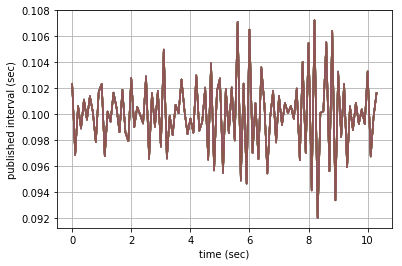

In [89]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1,1,1)
[ax.plot(d[IF]['timestamp'][:-1] - d[IF]['timestamp'][0], dt[IF]) for IF in dt]
ax.grid(True)
ax.set_xlabel('time (sec)')
ax.set_ylabel('published interval (sec)')
fig.savefig('./published_interval.png')

In [90]:
dt1 = {}
for IF in IF_list:
    t = np.array(d[IF]['received_time'])
    dt1[IF] = t[1:] - t[:-1]

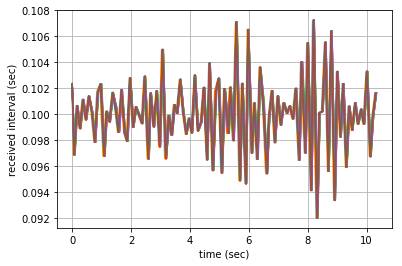

In [91]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1,1,1)
[ax.plot(d[IF]['received_time'][:-1] - d[IF]['received_time'][0], dt[IF]) for IF in dt]
ax.grid(True)
ax.set_xlabel('time (sec)')
ax.set_ylabel('received interval (sec)')
fig.savefig('./received_interval.png')

In [92]:
spec = {}
for IF in IF_list:
    spec[IF] = d[IF]['spec'].mean(axis=0)

In [93]:
freq = np.linspace(0, 2, 2**15) 

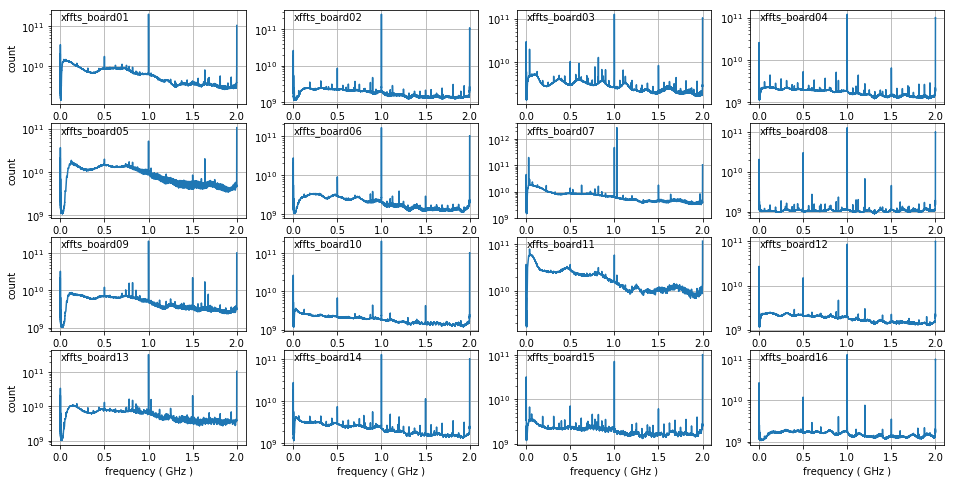

In [94]:
fig = matplotlib.pyplot.figure(figsize=(16,8))
ax =[fig.add_subplot(4,4, i) for i in range(1,17)]
for i,(_ax,IF) in enumerate(zip(ax, IF_list)):
    _ax.plot(freq, spec[IF])
    if i //4 == 3:
        _ax.set_xlabel('frequency ( GHz )')
    _ax.set_yscale('log')
    if i%4 == 0:
        _ax.set_ylabel('count')
    _ax.text(0.05, 0.9, IF, transform=_ax.transAxes)
    _ax.set_xticks(np.arange(0, 2.1, 0.5))
    _ax.grid()
fig.savefig('./band_character.png')

In [95]:
tp = {}
for IF in IF_list:
    tp[IF] = d[IF]['spec'].sum(axis=1)

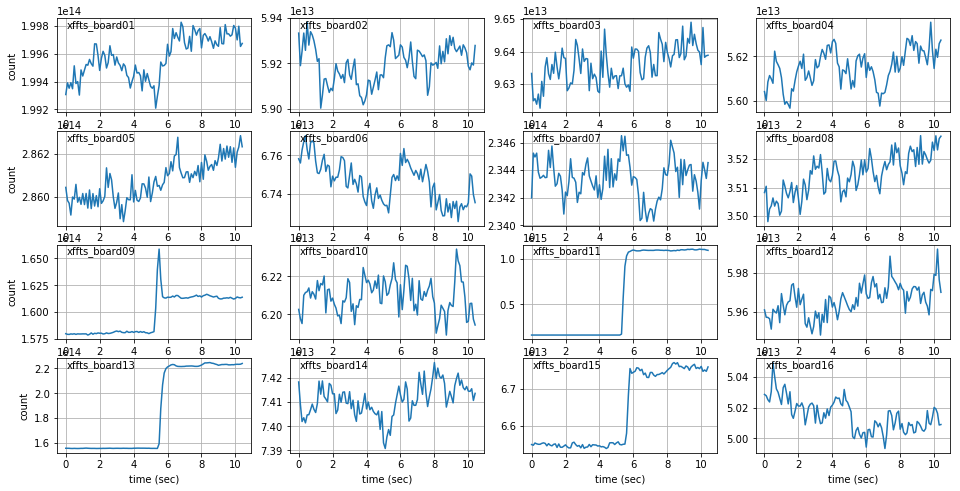

In [96]:
fig = matplotlib.pyplot.figure(figsize=(16,8))
ax =[fig.add_subplot(4,4, i) for i in range(1,17)]
for i,(_ax,IF) in enumerate(zip(ax, IF_list)):
    _ax.plot(d[IF]['timestamp'] - d[IF]['timestamp'][0],tp[IF])
    if i //4 == 3:
        _ax.set_xlabel('time (sec)')
    #_ax.set_yscale('log')
    if i%4 == 0:
        _ax.set_ylabel('count')
    _ax.text(0.05, 0.9, IF, transform=_ax.transAxes)
    _ax.grid()
fig.savefig('./total_power.png')

In [97]:
#通常配線

In [98]:
hemt_dict = {
    '2l': ['hemt_2l_vd','hemt_2l_vg1','hemt_2l_vg2'],
    '2r': ['hemt_2r_vd','hemt_2r_vg1','hemt_2r_vg2'],
    '3l': ['hemt_3l_vd','hemt_3l_vg1','hemt_3l_vg2'],
    '3r': ['hemt_3r_vd','hemt_3r_vg1','hemt_3r_vg2'],
    '4l': ['hemt_4l_vd','hemt_4l_vg1','hemt_4l_vg2'],
    '4r': ['hemt_4r_vd','hemt_4r_vg1','hemt_4r_vg2'],
    '5l': ['hemt_5l_vd','hemt_5l_vg1','hemt_5l_vg2'],
    '5r': ['hemt_5r_vd','hemt_5r_vg1','hemt_5r_vg2'],
}
h = {}
for hemt in hemt_dict:
    h[hemt] = {}
    for _hemt in hemt_dict[hemt]:
           h[hemt][_hemt] = db.open_table(_hemt).read(astype='array')

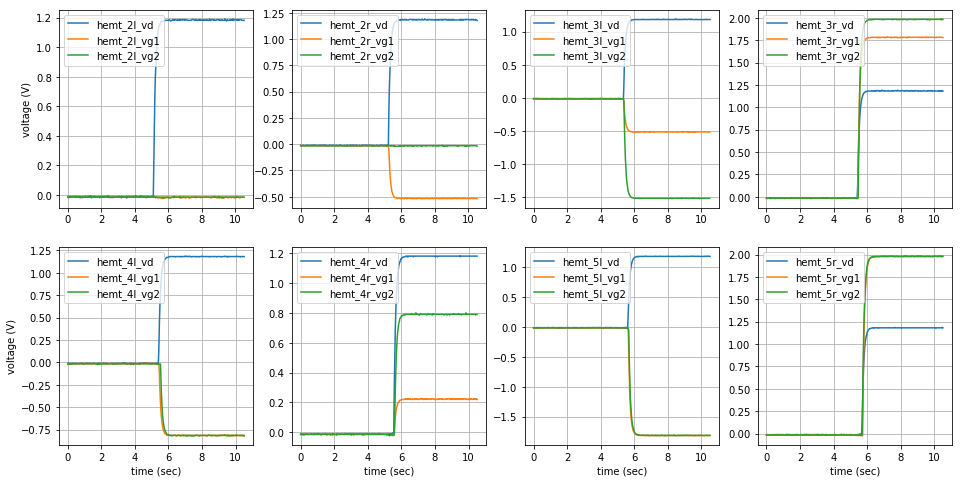

In [101]:
fig = matplotlib.pyplot.figure(figsize=(16,8))
ax =[fig.add_subplot(2,4, i) for i in range(1,9)]
for i,(_ax,hemt) in enumerate(zip(ax, hemt_dict)):
    for _hemt in hemt_dict[hemt]:
        _ax.plot(h[hemt][_hemt]['received_time'] - h[hemt][_hemt]['received_time'][0], h[hemt][_hemt]['data'], label=_hemt)
    if i//4 == 1:
        _ax.set_xlabel('time (sec)')
    if i%4 == 0: 
        _ax.set_ylabel('voltage (V)')
    #_ax.text(0.05, 0.9, hemt, transform=_ax.transAxes)
    _ax.grid()
    _ax.legend(loc='upper left')
fig.savefig('./hemt_.bias.png')